### IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Reading data on Investment Rounds in 2008-18 from investments input

In [2]:
#Reading Total Investments Data for all Companies in the sector between 2008-18

df_inv = pd.read_csv('./input_data/investmentInput.csv')

df_inv.head(3)

,Year,Org_Name,Funding_Round_Type,Funding_Amt_USD,Funding_Stage
0,2018,Zelros,Series A,4532800,Early Stage
1,2018,Axyon AI,Series Unknown,1473160,Uncategorized
2,2018,Oriente,Series A,105000000,Early Stage


##### Note:  For categorization details of Funding Round Types into  Funding Stages See investmentDataMunging.ipynb Sl No. 5 

    

### 2. Set of all Funding Stages

In [3]:
print(df_inv['Funding_Stage'].unique())

['Early Stage' 'Uncategorized' 'Seed' 'Late Stage' 'Private Equity']


### 3. Defining functions to extract data on YoY funding amounts and rounds by Stage, plot and save results

#### a. Extractor function

In [4]:
#Takes input dataframe and extracts info on YoY Funding Amount and No. of Rounds by Stage

def RoundsandFundingByStage(fundingStage, df_inp):
    
    # Extracting funding data relevant to funding stage into df_stage
    df_stage = df_inp[df_inp['Funding_Stage']==fundingStage]
    
    
    # Grouping df_stage by Year
    group = df_stage.groupby(by='Year',axis=0)

    # Extracting Funding Rounds count to series
    rounds_count_ser = group['Org_Name'].count()

    # Extracting Total Funding Amount to series
    funding_amt_ser = group['Funding_Amt_USD'].sum()

    #  Creating dataframe
    df_out = pd.DataFrame({
                                'Funding_Rounds': rounds_count_ser,
                                'Funding_Amt_USD': funding_amt_ser
                              })
    
    # Resetting index of df_out
    df_out.reset_index(drop=False, inplace=True)
    
    # Deleting df_stage dataframe
    del df_stage
    
    return df_out

#### b. Plotter function

In [5]:
def PlotRoundsAndFundingByStage(df_inp, plotTitle):
    
    #Setting view styles for plotting graph
    sns.set(style="white", rc={"lines.linewidth": 3})
    
    #specifying size of plot
    plt.subplots(figsize = (8, 6))
    
    #X-axis Range
    plt.xticks(np.arange(start=2008, stop=2019, step=1))
    
    #Plotting Bar Graph: Total Funding Amount w.r.t Year 
    ax = sns.barplot(x='Year',
                y='Funding_Amt_USD',
                data=df_inp,
                color='#004488',
                label='Amount'
                )
    
    #Creating another overlapping axes for Year to plot No of Rounds w.r.t Year
    ax2 = ax.twinx()

    #Plotting Line Graph: No of Funding Rounds w.r.t Year
    ax2.plot(ax.get_xticks(), df_inp['Funding_Rounds'], color='r', marker='o', label='Rounds')
    
    #Specifying title, labels & legend 
    ax.set_title(plotTitle,fontdict={'fontsize':13,'fontweight':'bold'})
    ax.legend() 
    ax2.legend(borderaxespad=3)
    ax.set(xlabel='Year', ylabel='Funding Amount in USD')
    ax2.set(ylabel='Funding Rounds Count')
    
    #Resetting view styles to default
    sns.set()
    

### 3. Extracting data and plotting Results

### a. Seed Stage

In [6]:
# Extracting seed_stage YoY Funding amount and No of Funding Rounds Count from input df_inv

seed_stage_df = RoundsandFundingByStage('Seed',df_inv)

seed_stage_df.head(3)

,Year,Funding_Rounds,Funding_Amt_USD
0,2009,1,365275
1,2010,4,290384
2,2011,6,3903431


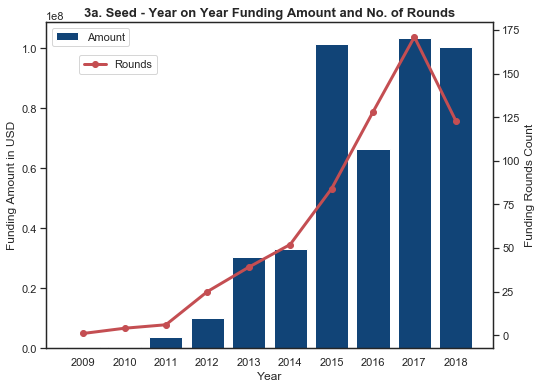

In [7]:
#Plotting trends from seed_df

plotTitle = '3a. Seed - Year on Year Funding Amount and No. of Rounds'

PlotRoundsAndFundingByStage(seed_stage_df, plotTitle)

#Saving to output png file

plt.savefig('./output/plots/3a_YoY-Seed_Funding_Rounds.png', dpi=100)

### b. Early Stage

In [8]:
# Extracting seed_stage YoY Funding amount and No of Funding Rounds Count from input df_inv 

early_stage_df = RoundsandFundingByStage('Early Stage',df_inv)

early_stage_df.head(3)

,Year,Funding_Rounds,Funding_Amt_USD
0,2008,1,5020000
1,2011,2,25000000
2,2012,5,40740000


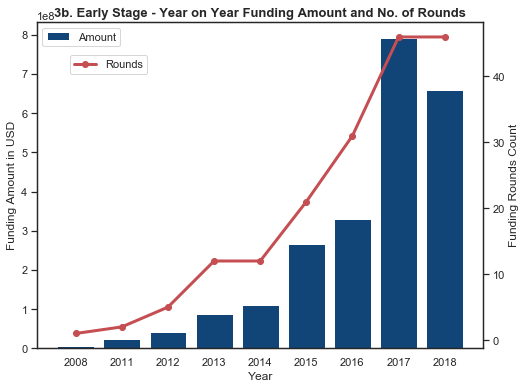

In [9]:
#Plotting trends from early_stage_df 

plotTitle='3b. Early Stage - Year on Year Funding Amount and No. of Rounds'

PlotRoundsAndFundingByStage(early_stage_df, plotTitle)

#Saving to output png file

plt.savefig('./output/plots/3b_YoY-EarlyStage_Funding_Rounds.png', dpi=100)

### c. Late Stage

In [10]:
# Extracting seed_stage YoY Funding amount and No of Funding Rounds Count from input df_inv 

late_stage_df = RoundsandFundingByStage('Late Stage',df_inv)

late_stage_df.head(3)

,Year,Funding_Rounds,Funding_Amt_USD
0,2013,3,32050000
1,2014,2,10000000
2,2015,3,164152500


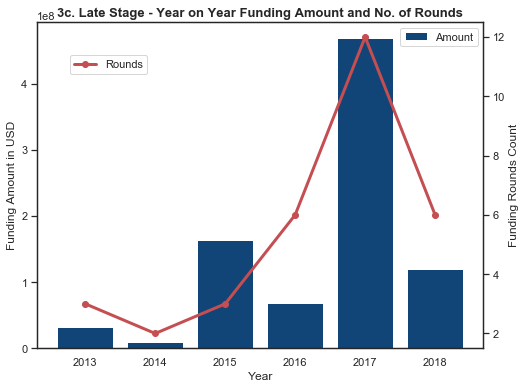

In [11]:
#Plotting trends from late_stage_df 

plotTitle='3c. Late Stage - Year on Year Funding Amount and No. of Rounds'

PlotRoundsAndFundingByStage(late_stage_df, plotTitle)

#Saving to output png file

plt.savefig('./output/plots/3c_YoY-LateStage_Funding_Rounds.png', dpi=100)

### 6. Saving results to file

In [12]:
# Writing data to output excel file

from openpyxl import load_workbook

book = load_workbook('./output/outputData.xlsx')

writer = pd.ExcelWriter('./output/outputData.xlsx', engine='openpyxl')

writer.book = book

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

seed_stage_df.to_excel(writer, '3a.YoY-Seed_Funding_Rounds', index=False)

early_stage_df.to_excel(writer,'3b.YoY-Early_Funding_Rounds', index=False)

late_stage_df.to_excel(writer,'3c.YoY-Late_Funding_Rounds', index=False)

writer.save()

### 7. Deleting dataframes, series to deallocate memory

In [13]:
del df_inv
del seed_stage_df
del early_stage_df
del late_stage_df